In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy.stats as st

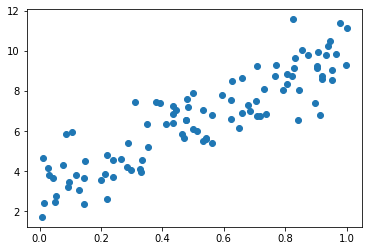

In [2]:
n = 100
x = np.random.rand(n)
y = 3 + 7*x + np.random.randn(n)

plt.scatter(x,y)

In [5]:
slope, intercept, CorrelationCoefficient, Pvalue , StandardError = st.linregress(x, y)
print(slope,intercept, CorrelationCoefficient, Pvalue , StandardError)

6.840948755412061 3.0324520601523846 0.890435018722499 2.8179426077637116e-35 0.3531976693677505


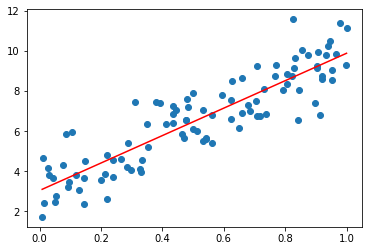

In [6]:
plt.scatter(x,y)
plt.plot([x.min(),x.max()],[slope*x.min()+intercept,slope*x.max()+intercept],color='red')

#### Variance of a predict Ypred is given by
<img src="pred.png">

In [18]:
eps = y - intercept - slope*x
x1 = np.linspace(0, 1)
e_pi = np.var(eps)*(1+1.0/n + (x1-x.mean())**2/np.sum((x-x.mean())**2))
zl = st.t.ppf(0.01, n-1)
zu = st.t.ppf(0.90, n-1)
ll = intercept + slope*x1 + np.sqrt(e_pi)*zl
ul = intercept + slope*x1 + np.sqrt(e_pi)*zu

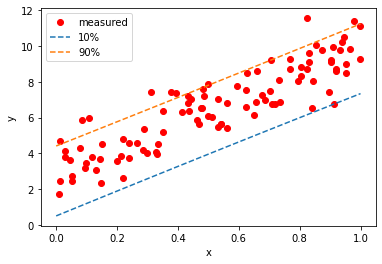

In [23]:
fig, ax = plt.subplots()
ax.plot(x,y,'ro', label='measured')
ax.plot(x1,ll,'--', label='10%')
ax.plot(x1,ul,'--', label='90%')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')

In [24]:
pp = pd.read_csv('pp.csv')
pp['Datetime'] = pd.to_datetime(pp['Datetime'])
pp = pp.set_index('Datetime')
pp.head()

,Agency,SiteNumber,Precipitation_in,Code,Day,Month,Year
Datetime,,,,,,,
2009-05-05,USGS,393938104572101,0.00,A,5,5,2009
2009-05-06,USGS,393938104572101,0.00,A,6,5,2009
2009-05-07,USGS,393938104572101,0.00,A,7,5,2009
2009-05-08,USGS,393938104572101,0.01,A,8,5,2009
2009-05-09,USGS,393938104572101,0.08,A,9,5,2009


<AxesSubplot:xlabel='Datetime'>

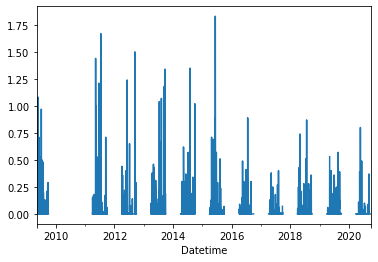

In [25]:
pp['Precipitation_in'].plot()

<AxesSubplot:xlabel='Datetime'>

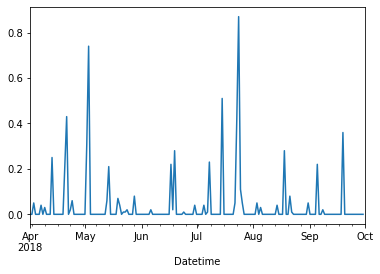

In [26]:
pp['Precipitation_in'].loc['2018-04-01':'2018-10-01'].plot()

In [27]:
y2018 = pp.loc['2018-04-01':'2018-10-01']
y2018 = y2018[y2018['Precipitation_in'].isnull()==False]

In [28]:
slope, intercept, CorrelationCoefficient, Pvalue , EstandardError = st.linregress(np.arange(y2018.index.shape[0]), y2018['Precipitation_in'])
slope, intercept

(-0.00011619528012970637, 0.0469672131147541)

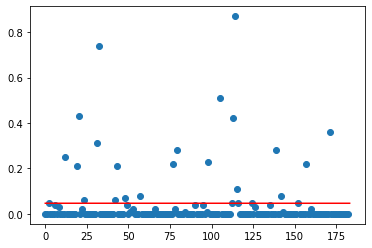

In [14]:
plt.plot([0,len(y2018)],[slope*x.min()+intercept,slope*x.max()+intercept],color='red')
plt.scatter(np.arange(y2018.index.shape[0]),y2018['Precipitation_in'])

#### Distribution plots

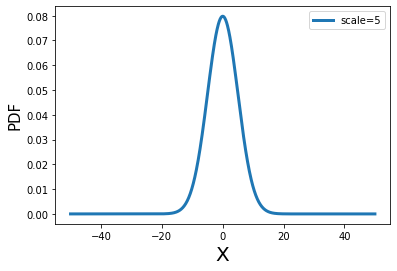

In [32]:
d = st.norm(loc=0, scale=5) # mean, standard deviation
x = np.linspace(-50,50, 1000)
y1 = d.pdf(x)

fig,ax =plt.subplots()
ax.plot(x, y1, lw=3, label='scale=5')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('PDF', fontsize=15)
ax.legend()

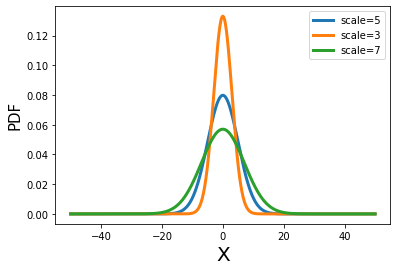

In [39]:
rv1 = st.norm(loc=0, scale=5) # mean, standard deviation
rv2 = st.norm(loc=0, scale=3)
rv3 = st.norm(loc=0, scale=7)

x = np.linspace(-50,50, 1000)
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

fig,ax =plt.subplots()
ax.plot(x, y1, lw=3, label='scale=5')
ax.plot(x, y2, lw=3, label='scale=3')
ax.plot(x, y3, lw=3, label='scale=7')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('PDF', fontsize=15)
ax.legend()

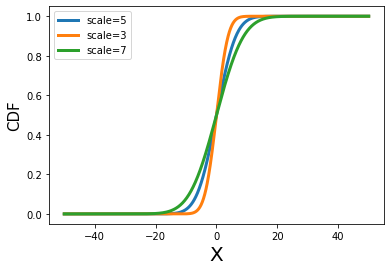

In [40]:
y1 = rv1.cdf(x)
y2 = rv2.cdf(x)
y3 = rv3.cdf(x)

fig,ax =plt.subplots()
ax.plot(x, y1, lw=3, label='scale=5')
ax.plot(x, y2, lw=3, label='scale=3')
ax.plot(x, y3, lw=3, label='scale=7')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('CDF', fontsize=15)
ax.legend()

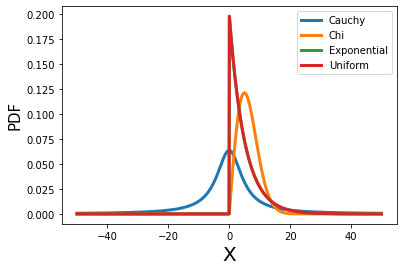

In [41]:
rv1 = st.cauchy(loc=0, scale=5)
rv2 = st.chi(2, loc=0, scale=5)
rv3 = st.expon(loc=0, scale=5)
rv4 = st.uniform(loc=0, scale=5)

# compute pdf
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)
y4 = rv4.pdf(x)

fig,ax =plt.subplots()
ax.plot(x, y1, lw=3, label='Cauchy')
ax.plot(x, y2, lw=3, label='Chi')
ax.plot(x, y3, lw=3, label='Exponential')
ax.plot(x, y3, lw=3, label='Uniform')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('PDF', fontsize=15)
ax.legend()

#### Best fit distribution for precipitation.

In [43]:
datos = pd.read_excel('F_Wayne_Tmp_Pcp_Filter.xlsx',sheet_name='Sheet1',index_col=0)
datos.head()

,Pcr (xx),Pcp (mm)
Date,,
1941-01-01,71,7.1
1941-01-02,15,1.5
1941-01-03,0,0.0
1941-01-04,0,0.0
1941-01-05,0,0.0


In [44]:
datos = datos.rename(columns={'Pcp (mm)': 'Ppt'})
datos.head()

,Pcr (xx),Ppt
Date,,
1941-01-01,71,7.1
1941-01-02,15,1.5
1941-01-03,0,0.0
1941-01-04,0,0.0
1941-01-05,0,0.0


<AxesSubplot:xlabel='Date'>

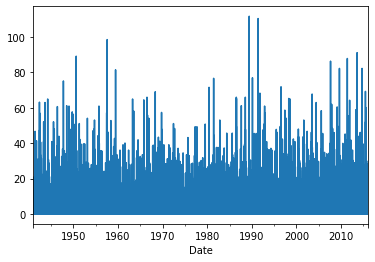

In [45]:
datos['Ppt'].plot()

In [46]:
datos['Ppt'].describe()

count    27393.000000
mean         2.567481
std          6.828232
min          0.000000
25%          0.000000
50%          0.000000
75%          1.300000
max        111.800000
Name: Ppt, dtype: float64

<AxesSubplot:>

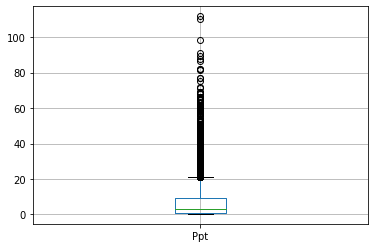

In [47]:
datos[datos['Ppt']>0].boxplot('Ppt')

<AxesSubplot:>

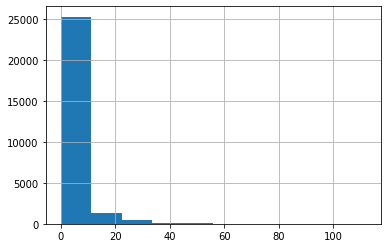

In [48]:
datos['Ppt'].hist()

In [49]:
# for 10 years: 1950 to 1960
datos['Ppt'].loc['1950-01-01':'1959-12-31'].describe()

count    3652.000000
mean        2.737979
std         7.080382
min         0.000000
25%         0.000000
50%         0.000000
75%         1.500000
max        98.600000
Name: Ppt, dtype: float64

In [50]:
# for 30 years: 1950 to 1980
datos['Ppt'].loc['1950-01-01':'1979-12-31'].describe()

count    10957.000000
mean         2.436789
std          6.319161
min          0.000000
25%          0.000000
50%          0.000000
75%          1.300000
max         98.600000
Name: Ppt, dtype: float64

In [51]:
promedio = datos['Ppt'].mean()
desviacion = datos['Ppt'].std()
promedio,desviacion

(2.5674807432555764, 6.8282315143483645)

In [58]:
# now we determine the probabilistic distributions
tabulaciones = np.arange(datos['Ppt'].min(),datos['Ppt'].max(),0.1)

In [59]:
distnormal = st.norm.pdf(tabulaciones, loc=promedio, scale=desviacion)

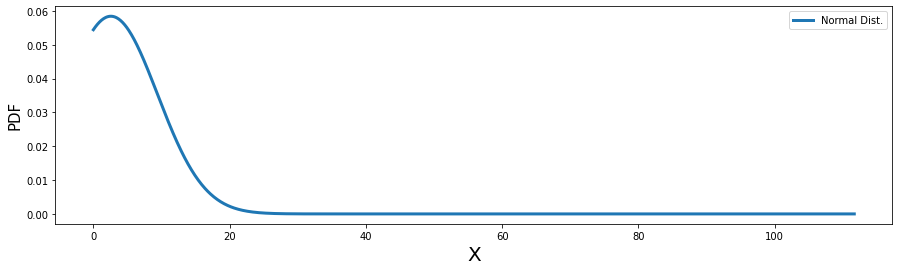

In [60]:
fig,ax =plt.subplots()
ax.plot(tabulaciones, distnormal, lw=3, label='Normal Dist.')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('PDF', fontsize=15)
ax.legend()

In [55]:
distnormal = st.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = st.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = st.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = st.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

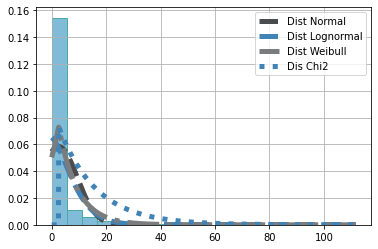

In [56]:
# we plot the normalized histogram and the probabilistic distributions
datos['Ppt'].hist(bins=20, edgecolor='#4aaaaa', color='#80BCD8',density=True)
plt.plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = 15, 4

#### Ex2

In [99]:
ws = pd.read_excel('station2.xlsx',skiprows=2,index_col='FECHA',parse_dates=True)
ws.head()

,ESTACION,OPERADOR,VARIABLE,HORA,VALOR,UNIDADMEDIDA
FECHA,,,,,,
1963-01-11,PILCOPATA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 1DIA,00:00:00,25.0,mm
1963-02-11,PILCOPATA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 1DIA,00:00:00,25.0,mm
1963-03-11,PILCOPATA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 1DIA,00:00:00,0.0,mm
1963-04-11,PILCOPATA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 1DIA,00:00:00,15.1,mm
1963-05-11,PILCOPATA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 1DIA,00:00:00,0.0,mm


<AxesSubplot:xlabel='FECHA'>

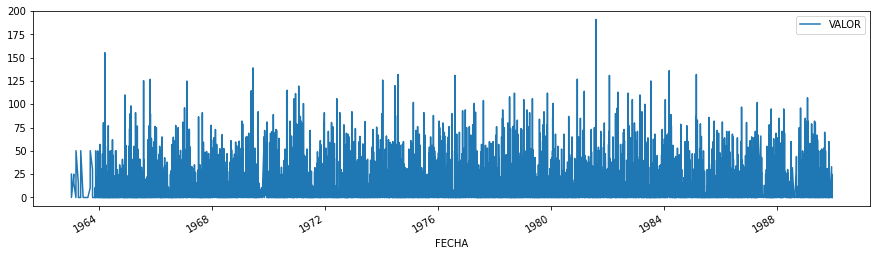

In [102]:
ws.plot()

In [100]:
promedio = ws['VALOR'].mean()
desviacion = ws['VALOR'].std()
promedio,desviacion

(10.538268095342227, 18.48991989998275)

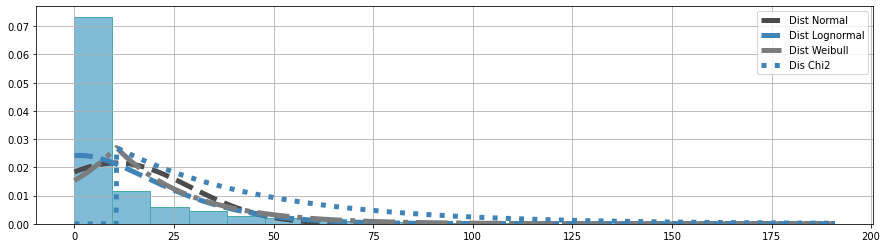

In [101]:
# now we determine the probabilistic distributions
tabulaciones = np.arange(ws['VALOR'].min(),ws['VALOR'].max(),0.1)

distnormal = st.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = st.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = st.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = st.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

# we plot the normalized histogram and the probabilistic distributions
ws['VALOR'].hist(bins=20, edgecolor='#4aaaaa', color='#80BCD8',density=True)
plt.plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = 15, 4

#### Ex3

In [103]:
Yauyos = pd.read_csv('Precip_Est_Yauyos.csv', index_col=0, parse_dates=True)

<AxesSubplot:>

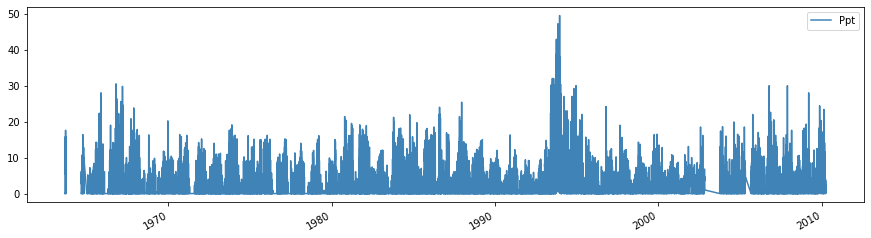

In [104]:
Yauyos.plot(color='#3F83B7')

In [105]:
promedio = Yauyos[Yauyos>0].mean()
desviacion = Yauyos[Yauyos>0].std()
print(promedio, desviacion)

Ppt    5.589663
dtype: float64 Ppt    4.965991
dtype: float64


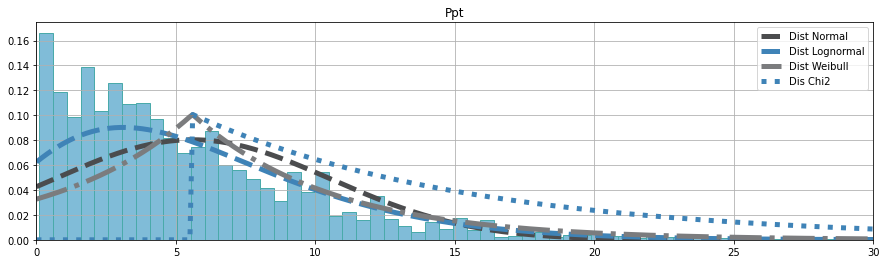

In [109]:
#determinamos las regresiones estadisticas
tabulaciones = np.arange(Yauyos.Ppt.min(),Yauyos.Ppt.max(),0.1)
distnormal = st.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = st.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = st.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = st.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

Yauyos[Yauyos>0].hist(bins=100, density=True, edgecolor='#4aaaaa', color='#80BCD8')
plt.plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
plt.xlim(0,30)
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = 16,8

#### Return period 100 years

In [110]:
p100y_norm = st.norm.ppf([1/100], loc=promedio, scale=desviacion)
p100y_lognorm = st.pearson3.ppf([1/100], skew=1, loc=promedio, scale=desviacion)
p100y_weibull = st.dweibull.ppf([1/100], c=1, loc=promedio, scale=desviacion)
p100y_chi2 = st.chi2.ppf([1/100], df=2, loc=promedio, scale=desviacion)

print("Precipitation for T=100años Normal Dist =", p100y_norm[0])
print("Precipitation for T=100años Logormal Dist =", p100y_lognorm[0])
print("Precipitation for T=100años Weibull Dist =", p100y_weibull[0])
print("Precipitation for T=100años Chi2 Dist =", p100y_chi2[0])

Precipitation for T=100años Normal Dist = -5.962958928335638
Precipitation for T=100años Logormal Dist = -2.298195808793828
Precipitation for T=100años Weibull Dist = -13.837406780891248
Precipitation for T=100años Chi2 Dist = 5.689482575259646


#### Return period 200 years

In [111]:
p200y_norm = st.norm.ppf([1/200], loc=promedio, scale=desviacion)
p200y_lognorm = st.pearson3.ppf([1/200], skew=1, loc=promedio, scale=desviacion)
p200y_weibull = st.dweibull.ppf([1/200], c=1, loc=promedio, scale=desviacion)
p200y_chi2 = st.chi2.ppf([1/200], df=2, loc=promedio, scale=desviacion)

print("Precipitation for T=200años Normal Dist  =", p200y_norm[0])
print("Precipitation for T=200años Logormal Dist =", p200y_lognorm[0])
print("Precipitation for T=200años Weibull Dist =", p200y_weibull[0])
print("Precipitation for T=200años Chi2 Dist =", p200y_chi2[0])

Precipitation for T=200años Normal Dist  = -7.201881370868671
Precipitation for T=200años Logormal Dist = -2.673232742202549
Precipitation for T=200años Weibull Dist = -17.279569188199673
Precipitation for T=200años Chi2 Dist = 5.639447299312414


In [43]:
p500y_norm = st.norm.ppf([0.998], loc=promedio, scale=desviacion)
p500y_lognorm = st.pearson3.ppf([0.998], skew=1, loc=promedio, scale=desviacion)
p500y_weibull = st.dweibull.ppf([0.998], c=1, loc=promedio, scale=desviacion)
p500y_chi2 = st.chi2.ppf([0.998], df=2, loc=promedio, scale=desviacion)

print("Precipitación para T=200años Dist Normal =", p500y_norm[0])
print("Precipitación para T=200años Dist Logormal =", p500y_lognorm[0])
print("Precipitación para T=200años Dist Weibull =", p500y_weibull[0])
print("Precipitación para T=200años Dist Chi2 =", p500y_chi2[0])

Precipitación para T=200años Dist Normal = 19.882587070049723
Precipitación para T=200años Dist Logormal = 25.890733542281012
Precipitación para T=200años Dist Weibull = 33.0091860371984
Precipitación para T=200años Dist Chi2 = 67.31303406120736


## Specific Probabilities

In [112]:
Yauyos['Year'] = Yauyos.index.year
Yauyos.head()

,Ppt,Year
1963-09-01,0.0,1963
1963-09-02,0.0,1963
1963-09-03,0.0,1963
1963-09-04,0.0,1963
1963-09-05,12.4,1963


In [113]:
GroupedYauyos = Yauyos.groupby('Year').max()
GroupedYauyos.head()

,Ppt
Year,
1963,17.6
1964,16.4
1965,28.0
1966,30.5
1967,29.8


In [118]:
GroupedYauyos = GroupedYauyos.sort_values("Ppt",ascending=False)
GroupedYauyos.head()

,Ppt
Year,
1993,49.5
1966,30.5
1994,30.4
2007,30.0
2006,30.0


In [130]:
GroupedYauyos['Probability'] = [(i+1)/(len(GroupedYauyos)+1) for i in range(len(GroupedYauyos))]
GroupedYauyos.head()

,Ppt,Probability
Year,,
1993,49.5,0.020408
1966,30.5,0.040816
1994,30.4,0.061224
2007,30.0,0.081633
2006,30.0,0.102041


In [131]:
GroupedYauyos['ReturnPeriod'] = 1/GroupedYauyos['Probability']
GroupedYauyos.head()

,Ppt,Probability,ReturnPeriod
Year,,,
1993,49.5,0.020408,49.000000
1966,30.5,0.040816,24.500000
1994,30.4,0.061224,16.333333
2007,30.0,0.081633,12.250000
2006,30.0,0.102041,9.800000


In [133]:
GroupedYauyos

,Ppt,Probability,ReturnPeriod
Year,,,
1993,49.5,0.020408,49.000000
1966,30.5,0.040816,24.500000
1994,30.4,0.061224,16.333333
2007,30.0,0.081633,12.250000
2006,30.0,0.102041,9.800000
1967,29.8,0.122449,8.166667
1965,28.0,0.142857,7.000000
2009,28.0,0.163265,6.125000
1987,25.4,0.183673,5.444444
